In [1]:
import pandas as pd
import numpy as np
from PlateAnalysis_Buffers import PlateDataset
import matplotlib.pyplot as plt

design = pd.read_csv('20191109_Exp1_BufferScreenDesign.csv')

p1t0 = PlateDataset('20191109_BufferScreening_plate1_t0.CSV')

p2t0 = PlateDataset('20191109_BufferScreening_plate2_t0.CSV')
p1t1 = PlateDataset('20191109_BufferScreening_plate1_t1.CSV')
p2t1 = PlateDataset('20191109_BufferScreening_plate2_t1.CSV')
p1t2 = PlateDataset('20191109_BufferScreening_plate1_t2.CSV')
p2t2 = PlateDataset('20191109_BufferScreening_plate2_t2.CSV')



print('Plate 1 t0')
p1t0.PlotTrace(range(1,25))
print('Plate 2 t0')
p2t0.PlotTrace(range(1,25))
print('Plate 1 t1')
p1t1.PlotTrace(range(1,25))
print('Plate 2 t1')
p2t1.PlotTrace(range(1,25))
print('Plate 1 t2')
p1t2.PlotTrace(range(1,25))
print('Plate 2 t2')
p2t2.PlotTrace(range(1,25))


/home/james/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Plate 1 t0


<Figure size 2000x1000 with 1 Axes>

Plate 2 t0


<Figure size 2000x1000 with 1 Axes>

Plate 1 t1


<Figure size 2000x1000 with 1 Axes>

Plate 2 t1


<Figure size 2000x1000 with 1 Axes>

Plate 1 t2


<Figure size 2000x1000 with 1 Axes>

Plate 2 t2


<Figure size 2000x1000 with 1 Axes>

## Signal to Noise:
Below I've plotted the same plots as above but the traces are colored by a 'signal to noise' metric I invented, which is the A420 - A390 (minmax scaled within each set of plate data for the sake of coloring). I couldn't easily put a colorbar on, but it seems like an OK metric.

Plate 1 t0


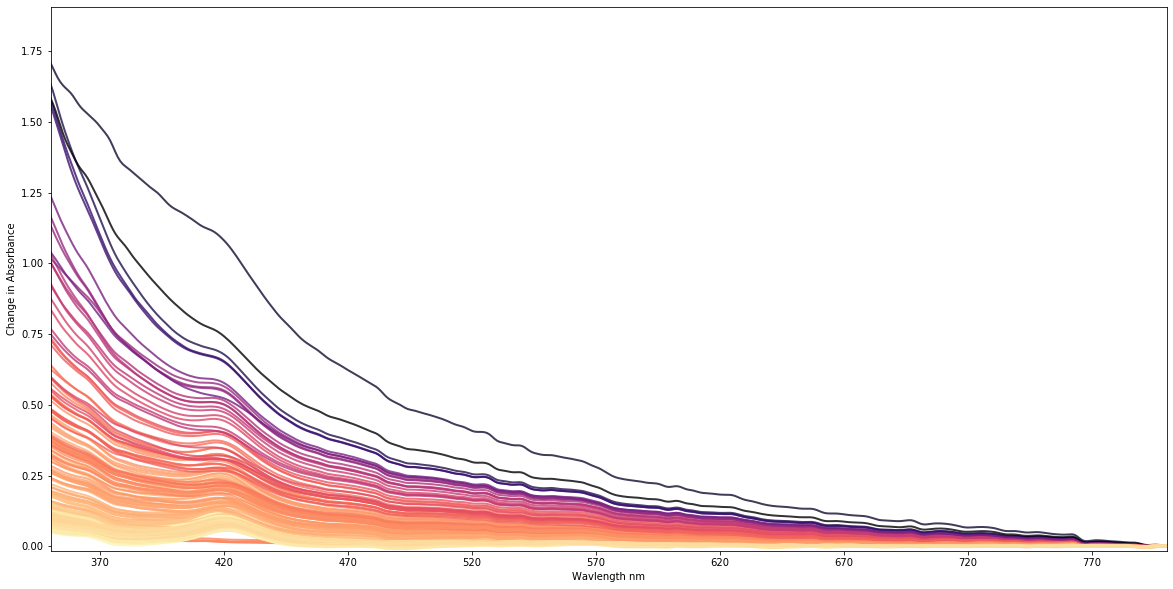

Plate 2 t0


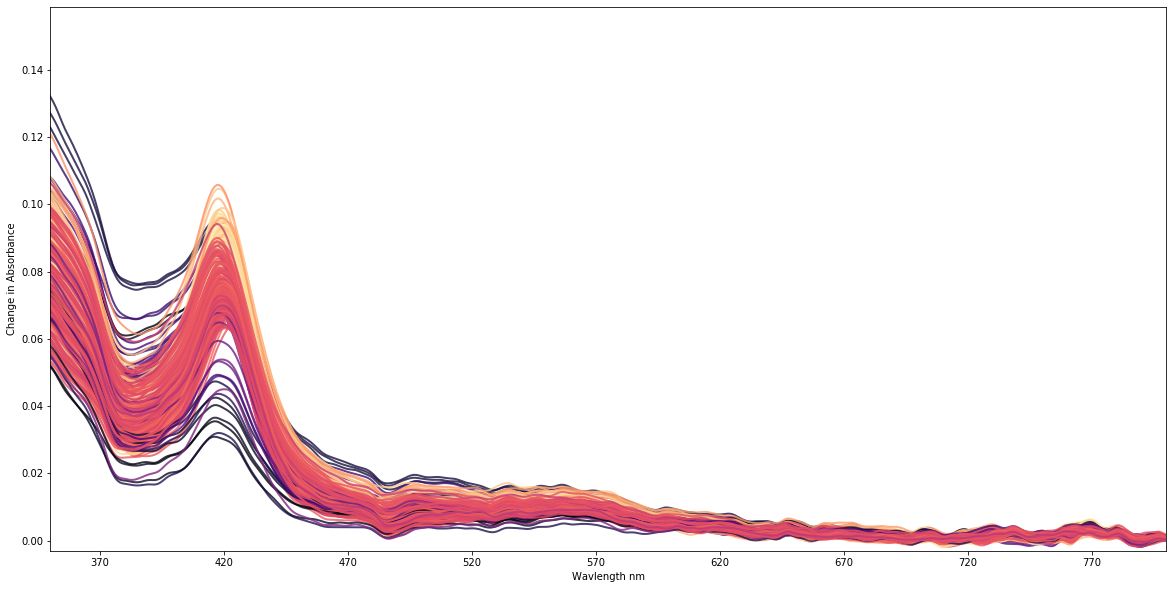

Plate 1 t1


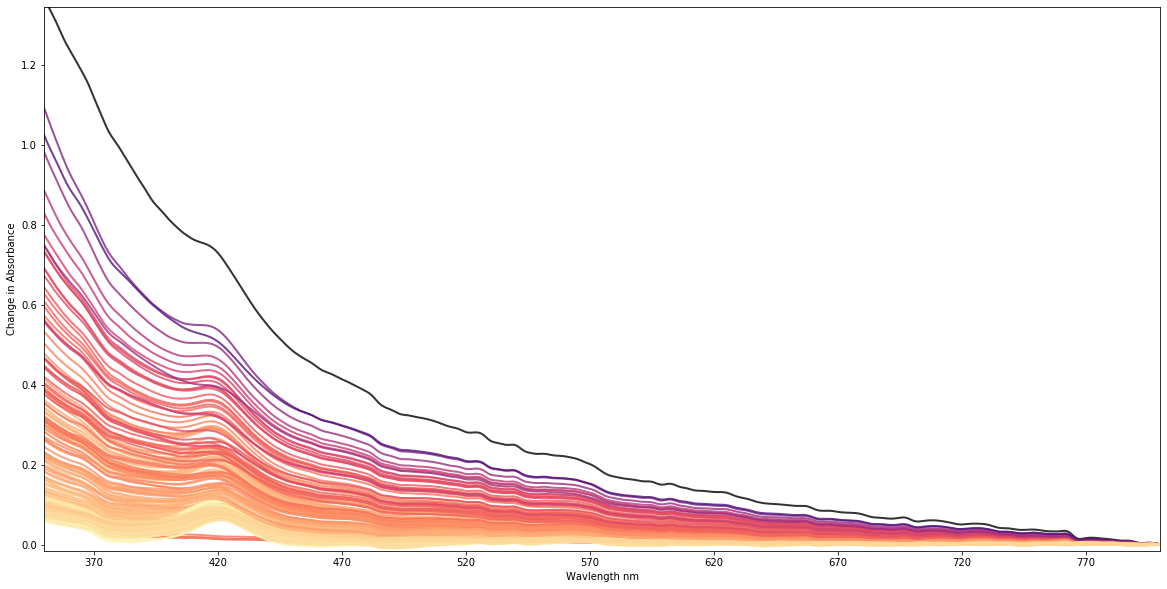

Plate 2 t1


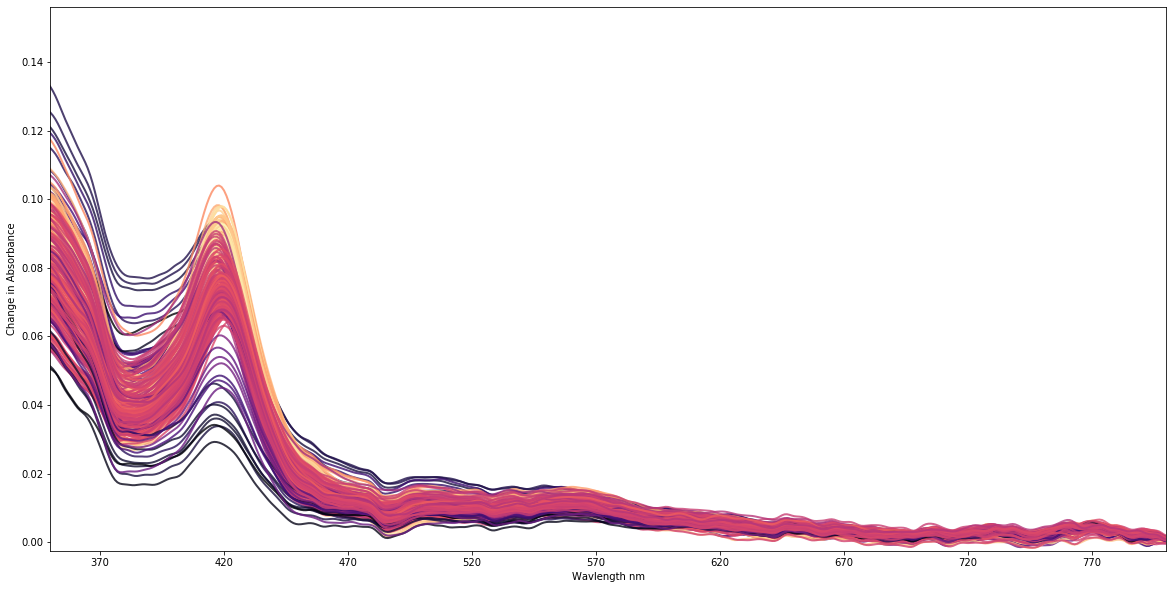

Plate 1 t2


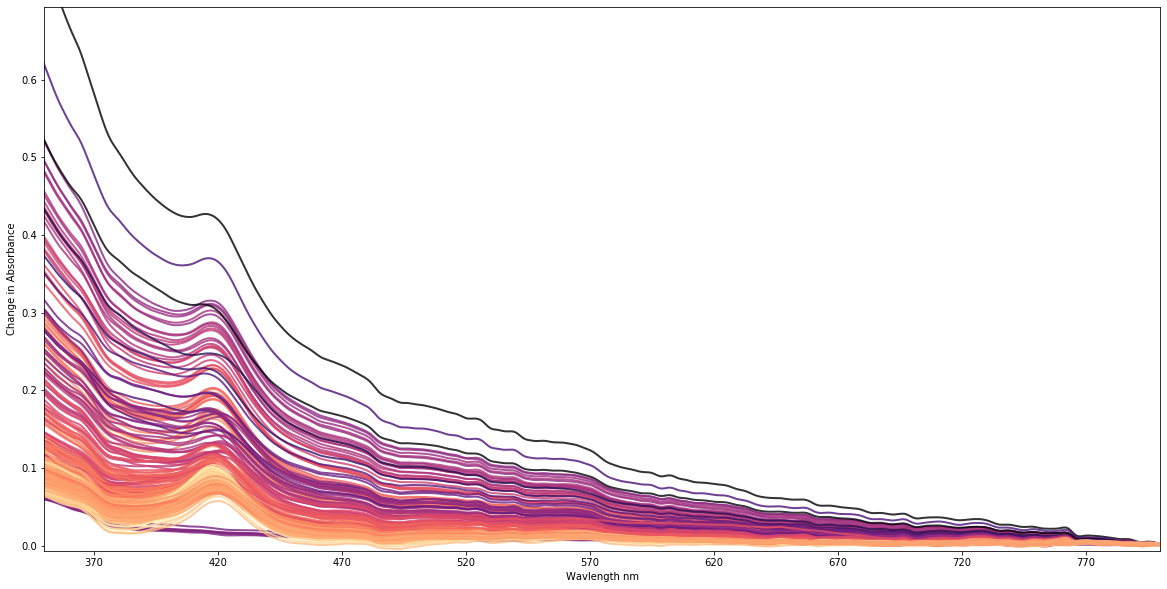

Plate 2 t2


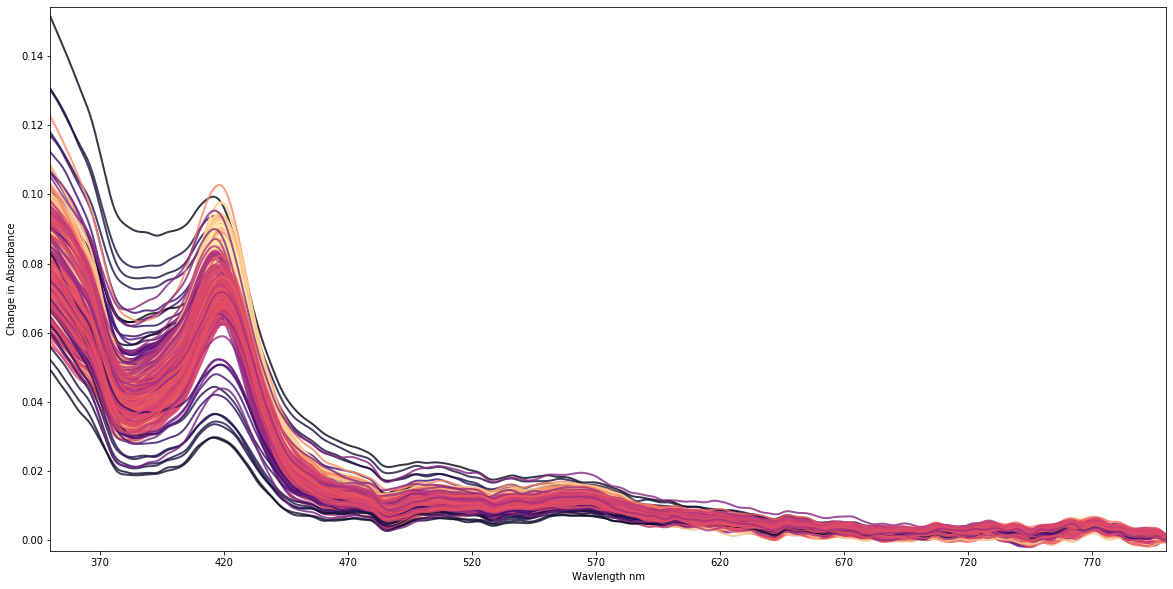

In [2]:
print('Plate 1 t0')
p1t0.PlotTrace(range(1,25),colors = True)
print('Plate 2 t0')
p2t0.PlotTrace(range(1,25),colors = True)
print('Plate 1 t1')
p1t1.PlotTrace(range(1,25),colors = True)
print('Plate 2 t1')
p2t1.PlotTrace(range(1,25),colors = True)
print('Plate 1 t2')
p1t2.PlotTrace(range(1,25),colors = True)
print('Plate 2 t2')
p2t2.PlotTrace(range(1,25),colors = True)

# 420 - 390 looks like an ok signal to noise metric
I could also try to find the inflection point and use that, which would be useful when I've added substrate. For now though, this should filter out any potential substrates that might interfere with the assay

In [3]:
p1t0.metadata

,User: USER,Path: C:\Program Files (x86)\BMG\PHERAstar\User\Data\,Test run no.: 285
0,Test name: heme shift,Date: 09/11/2019,Time: 16:21:12
1,ID1: 20191109_BufferScreening_plate1_t0,NaN,NaN
2,Absorbance spectrum,NaN,NaN


### Making a Dataframe with all x and y factors

In [4]:
import re
from tqdm import tqdm


def GetData(index,plate1,plate2):
    plate = 1
    start =(index*3)+1
    end = (index+1)*3
    if start >24:
        plate = 2
        start -=24
        end -= 24
    #get time
    if plate ==1:
        data = pd.DataFrame([],columns = plate1.data.columns)
        for i in range(start,end+1):
            temp = plate1.GetCols(i)
            data = temp.append(temp)
        S2N =  data.loc[:,417] / data.loc[:,400]
        t = plate1.metadata.iloc[0,2]
        t = re.search(r'\d\d:\d\d:\d\d',t)[0]
        d= plate1.metadata.iloc[0,1]
        d = re.search(r'\d\d/\d\d/\d\d\d\d',d)[0]
        
        return S2N, d, t
    
    
    if plate ==2:
        data = pd.DataFrame([],columns = plate2.data.columns)
        for i in range(start,end+1):
            temp = plate2.GetCols(i)
            data = temp.append(temp)
        S2N =  data.loc[:,417] / data.loc[:,400]
        t = plate2.metadata.iloc[0,2]
        t = re.search(r'\d\d:\d\d:\d\d',t)[0]
        d= plate2.metadata.iloc[0,1]
        d = re.search(r'\d\d/\d\d/\d\d\d\d',d)[0]
        
        return S2N, d, t

    
def AssembleDataFrame(design,plateDict):
    output = pd.DataFrame([],columns = ['Triton  / %', 'DMSO /%', 'Arginine / mM', 'Glucose / mM',
           'KPi / mM', 'KCl / mM', 'NaCl / mM', 'NH4 / mM', 'BSA /mg/ml','Date','Time','Signal to Noise'])
    for timepoint in plateDict:
        plate1, plate2 = plateDict[timepoint]
        for i in tqdm(design.index):
            S2N, date, time = GetData(i,plate1,plate2)
            for j in S2N:
                temp = design.loc[[i],'Triton  / %':]
                temp['Date'] = date
                temp['Time'] = time
                temp['Signal to Noise'] = j
                output = output.append(temp)
    output.reset_index(inplace = True, drop=True)
    return output

plateDict = {0:[p1t0,p2t0],1:[p1t1,p2t1],2:[p1t2,p2t2]}

df = AssembleDataFrame(design,plateDict)
df

100%|██████████| 16/16 [00:04<00:00,  3.86it/s]


,Triton / %,DMSO /%,Arginine / mM,Glucose / mM,KPi / mM,KCl / mM,NaCl / mM,NH4 / mM,BSA /mg/ml,Date,Time,Signal to Noise
0,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.098291
1,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.164835
2,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.033613
3,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.041916
4,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,0.979716
5,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.017456
6,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.125000
7,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.061489
8,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.196429
9,0.00,0,0,0,0,0,0,0,0.1,09/11/2019,16:21:12,1.059649


In [5]:
df.to_csv('PlateSignalToNoise_NotPorcessed.csv')
# by not porcessed I mean I haven't normalised the S2N values or 
# Turned the time into something manageable

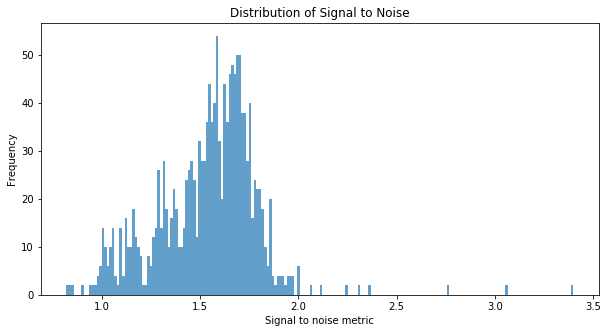

In [6]:
plt.figure(figsize = (10,5))
plt.hist(df['Signal to Noise'], bins = 200, alpha = 0.7)
plt.title('Distribution of Signal to Noise')
plt.xlabel('Signal to noise metric')
plt.ylabel('Frequency')
plt.show()

# Processing + normalisation

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn

# Splititing X and Y
x = df.loc[:,['Triton  / %', 'DMSO /%', 'Arginine / mM', 'Glucose / mM', 'KPi / mM',
       'KCl / mM', 'NaCl / mM', 'NH4 / mM', 'BSA /mg/ml']]
y = df[['Signal to Noise']]

# Calculating time between experiments
t = pd.to_datetime(df['Time']) - pd.to_datetime(df['Time']).min()
t = t.dt.total_seconds()
x['t'] = t

#scaling 

scaler = MinMaxScaler(feature_range=(0, 1))
stdscaler = StandardScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

   
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

# make into tensors
x_train, x_test, y_train, y_test = torch.tensor(x_train,dtype=torch.float),\
torch.tensor(x_test,dtype=torch.float), \
torch.tensor(y_train,dtype=torch.float), \
torch.tensor(y_test,dtype=torch.float)

## Linear Model

100%|██████████| 500/500 [00:06<00:00, 77.71it/s]


Training loss = 0.0076


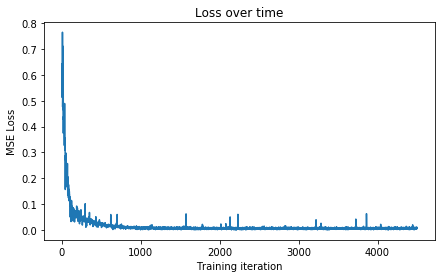

Test loss = 0.0062


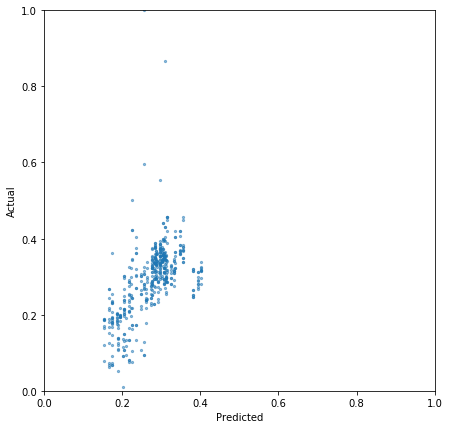

Weights:


,Triton / %,DMSO /%,Arginine / mM,Glucose / mM,KPi / mM,KCl / mM,NaCl / mM,NH4 / mM,BSA /mg/ml,Time
0,0.056056,0.073134,0.049507,0.017899,-0.000883,0.015236,0.004373,-0.020446,0.052013,-0.021905


In [8]:
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
    def __init__(self, x,y):
        self.x = x
        self.y = y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0]
    
    
train_loader = DataLoader(dataset=dataset(x_train,y_train),
                          batch_size=128,
                          shuffle=True,
                          num_workers=0)


lin = nn.Linear(10,1)
opt = torch.optim.Adam(lin.parameters(),lr = 1e-3)
loss_fn = nn.MSELoss()
lossrecord = []

for epoch in tqdm(range(500)):
    for i, batch in enumerate(train_loader, 0):
        x_,y_ = batch
        yhat = lin.forward(x_)
        loss = loss_fn(y_,yhat)
        loss.backward()
        opt.step()
        opt.zero_grad()

        lossrecord.append(loss.item())

print(f'Training loss = {round(loss.item(),4)}')

plt.figure(figsize = (7,4))
plt.plot(np.array(lossrecord))
plt.title('Loss over time')
plt.xlabel('Training iteration')
plt.ylabel('MSE Loss')
plt.show()

yhat = lin.forward(x_test)
err = loss_fn(y_test,yhat)
print(f'Test loss = {round(err.item(),4)}')

plt.figure(figsize=(7,7))
plt.scatter(yhat.detach(),y_test.detach(),alpha = 0.5, s =5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()


print('Weights:')
weights = pd.DataFrame(lin.weight.detach().numpy(),columns = ['Triton  / %', 'DMSO /%', \
                                                    'Arginine / mM', 'Glucose / mM', 'KPi / mM',\
                                                    'KCl / mM', 'NaCl / mM', 'NH4 / mM', 'BSA /mg/ml', 'Time'])
weights

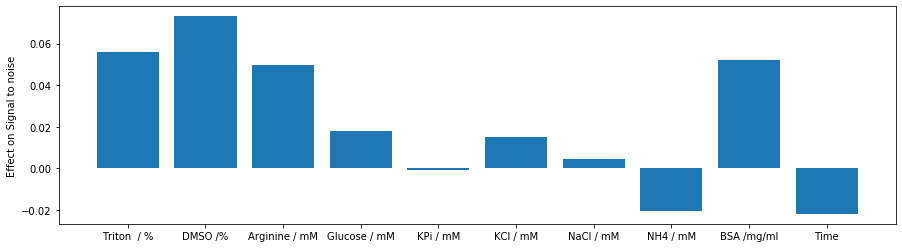

In [9]:
plt.figure(figsize = (15,4))
plt.bar(weights.columns,weights.loc[0,:])
plt.ylabel('Effect on Signal to noise')
plt.show()

In [17]:
lin.bias

Parameter containing:
tensor([0.1567], requires_grad=True)

### Second order model

In [11]:
from sklearn.preprocessing import PolynomialFeatures


# Splititing X and Y
x_poly = df.loc[:,['Triton  / %', 'DMSO /%', 'Arginine / mM', 'Glucose / mM', 'KPi / mM',
       'KCl / mM', 'NaCl / mM', 'NH4 / mM', 'BSA /mg/ml']]

# Calculating time between experiments
t = pd.to_datetime(df['Time']) - pd.to_datetime(df['Time']).min()
t = t.dt.total_seconds()
x_poly['t'] = t

# polynomial features
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x_poly)
#scaling 

scaler = MinMaxScaler(feature_range=(0, 1))
stdscaler = StandardScaler()

x_poly = stdscaler.fit_transform(x_poly)
   
# Train test split
x_poly_train, x_poly_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.33)

# make into tensors
x_poly_train, x_poly_test, y_train, y_test = torch.tensor(x_poly_train,dtype=torch.float),\
torch.tensor(x_poly_test,dtype=torch.float), \
torch.tensor(y_train,dtype=torch.float), \
torch.tensor(y_test,dtype=torch.float)

100%|██████████| 200/200 [00:03<00:00, 56.57it/s]


Training loss = 0.0252


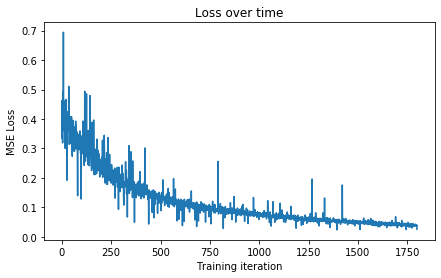

Test loss = 0.0404


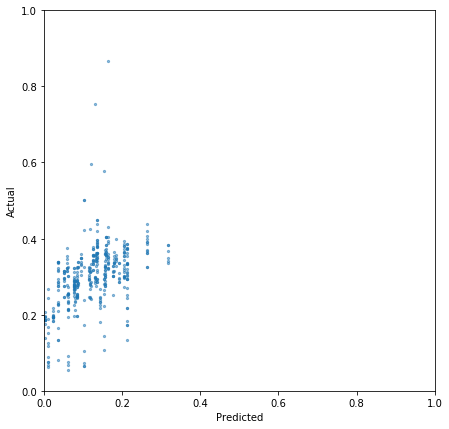

Weights:


,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x6^2,x6 x7,x6 x8,x6 x9,x7^2,x7 x8,x7 x9,x8^2,x8 x9,x9^2
0,0.018192,-0.047879,-0.006451,0.046273,0.036992,0.081076,0.121419,-0.035507,0.049957,0.007372,...,0.036313,-0.020545,-0.059791,-0.030151,-0.019051,-0.041674,0.027537,0.057346,0.009404,-0.005508


In [12]:
train_loader = DataLoader(dataset=dataset(x_poly_train,y_train),
                          batch_size=128,
                          shuffle=True,
                          num_workers=0)


polymodel = nn.Linear(x_poly_train.shape[1],1)
opt = torch.optim.Adam(polymodel.parameters(),lr = 1e-4)
loss_fn = nn.MSELoss()
lossrecord = []

for epoch in tqdm(range(200)):
    for i, batch in enumerate(train_loader, 0):
        x_,y_ = batch
        yhat = polymodel.forward(x_)
        loss = loss_fn(y_,yhat)
        loss.backward()
        opt.step()
        opt.zero_grad()

        lossrecord.append(loss.item())

print(f'Training loss = {round(loss.item(),4)}')

plt.figure(figsize = (7,4))
plt.plot(np.array(lossrecord))
plt.title('Loss over time')
plt.xlabel('Training iteration')
plt.ylabel('MSE Loss')
plt.show()

yhat = polymodel.forward(x_poly_test)
err = loss_fn(y_test,yhat)
print(f'Test loss = {round(err.item(),4)}')

plt.figure(figsize=(7,7))
plt.scatter(yhat.detach(),y_test.detach(),alpha = 0.5, s =5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()


print('Weights:')
poly_weights = pd.DataFrame(polymodel.weight.detach().numpy(),columns = poly.get_feature_names())
poly_weights

In [13]:
FactorNames = dict(zip(['x'+str(i) for i in range(10)],weights.columns))

PolyFactors = poly_weights.transpose()
PolyFactors.index = pd.Series(PolyFactors.index).replace(FactorNames,regex=True)
PolyFactors = PolyFactors.sort_values([0],ascending = False)
PolyFactors

,0
KCl / mM,0.121419
Arginine / mM^2,0.099561
DMSO /% BSA /mg/ml,0.091489
DMSO /% NaCl / mM,0.090004
Glucose / mM^2,0.084545
KPi / mM,0.081076
Triton / % BSA /mg/ml,0.062723
BSA /mg/ml^2,0.057346
Triton / % NaCl / mM,0.051517
NH4 / mM,0.049957


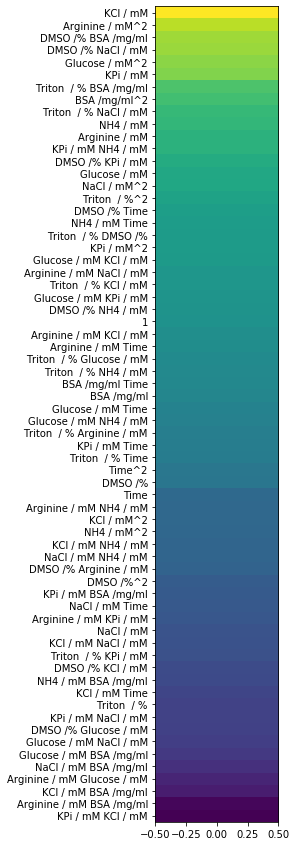

In [14]:
plt.figure(figsize = (3,15))
plt.imshow(PolyFactors,aspect = 0.1)
plt.yticks(range(len(PolyFactors.index)),PolyFactors.index)
plt.show()

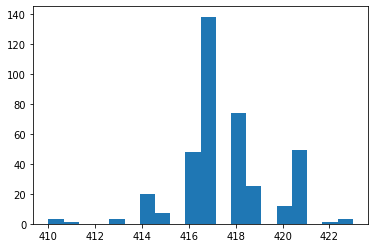

In [15]:
plt.hist(p1t2.data.loc[:,410:430].idxmax(axis=1),bins=20)
plt.show()

In [16]:
p1t2.data.loc[:,410:430].idxmax(axis=1)

WellLetter
A1     418
B1     418
C1     416
D1     416
E1     416
F1     414
G1     417
H1     417
I1     417
J1     417
K1     418
L1     417
M1     414
N1     410
O1     416
P1     418
A2     418
B2     417
C2     416
D2     418
E2     417
F2     417
G2     416
H2     417
I2     416
J2     417
K2     418
L2     418
M2     410
N2     411
      ... 
C23    421
D23    418
E23    418
F23    418
G23    418
H23    421
I23    418
J23    418
K23    421
L23    421
M23    419
N23    420
O23    420
P23    421
A24    421
B24    419
C24    418
D24    417
E24    418
F24    419
G24    421
H24    417
I24    420
J24    418
K24    418
L24    420
M24    419
N24    417
O24    419
P24    421
Length: 384, dtype: int64